In [ ]:
## Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
color = sns.color_palette()

from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox



from scipy import stats
from tqdm import tqdm_notebook

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')

In [2]:
## Getting the dataset
df= pd. read_csv("E:/URI Materials/3rd Semester/STA 500/Project/Water_Probability/water_potability.csv")
df["Potability"]=df["Potability"].astype('category')


In [5]:
df.head(20)

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0         NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1    3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2    8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3    8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4    9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   
5    5.584087  188.313324  28748.68774     7.544869  326.678363    280.467916   
6   10.223862  248.071735  28749.71654     7.513408  393.663395    283.651634   
7    8.635849  203.361523  13672.09176     4.563009  303.309771    474.607645   
8         NaN  118.988579  14285.58385     7.804174  268.646941    389.375566   
9   11.180284  227.231469  25484.50849     9.077200  404.041635    563.885481   
10   7.360640  165.520797  32452.61441     7.550701  326.624353    425.383420   
11   7.974522  218.693300  18767.65668     8.110385         NaN    364.098230   
12   7.119824  156.704993  18730.81365     3.606036  282.344050    347.715027   
13        NaN  150.174923  27331.36196     6.838223  299.415781    379.761835   
14   7.496232  205.344982  28388.00489     5.072558         NaN    444.645352   
15   6.347272  186.732881  41065.23476     9.629596  364.487687    516.743282   
16   7.051786  211.049406  30980.60079    10.094796         NaN    315.141267   
17   9.181560  273.813807  24041.32628     6.904990  398.350517    477.974642   
18   8.975464  279.357167  19460.39813     6.204321         NaN    431.443990   
19   7.371050  214.496611  25630.32004     4.432669  335.754439    469.914552   

    Organic_carbon  Trihalomethanes  Turbidity Potability  
0        10.379783        86.990970   2.963135          0  
1        15.180013        56.329076   4.500656          0  
2        16.868637        66.420093   3.055934          0  
3        18.436525       100.341674   4.628771          0  
4        11.558279        31.997993   4.075075          0  
5         8.399735        54.917862   2.559708          0  
6        13.789695        84.603556   2.672989          0  
7        12.363817        62.798309   4.401425          0  
8        12.706049        53.928846   3.595017          0  
9        17.927806        71.976601   4.370562          0  
10       15.586810        78.740016   3.662292          0  
11       14.525746        76.485911   4.011718          0  
12       15.929536        79.500778   3.445756          0  
13       19.370807        76.509996   4.413974          0  
14       13.228311        70.300213   4.777382          0  
15       11.539781        75.071617   4.376348          0  
16       20.397022        56.651604   4.268429          0  
17       13.387341        71.457362   4.503661          0  
18       12.888759        63.821237   2.436086          0  
19       12.509164        62.797277   2.560299          0

In [3]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [4]:
## Missing data in dataset
Miss = df.isna().sum().sort_values(ascending=False).to_frame()
Miss=100*Miss/3276
Miss



0
Sulfate          23.840049
ph               14.987790
Trihalomethanes   4.945055
Hardness          0.000000
Solids            0.000000
Chloramines       0.000000
Conductivity      0.000000
Organic_carbon    0.000000
Turbidity         0.000000
Potability        0.000000

<Axes: title={'center': 'Missing Values Per Feature'}>

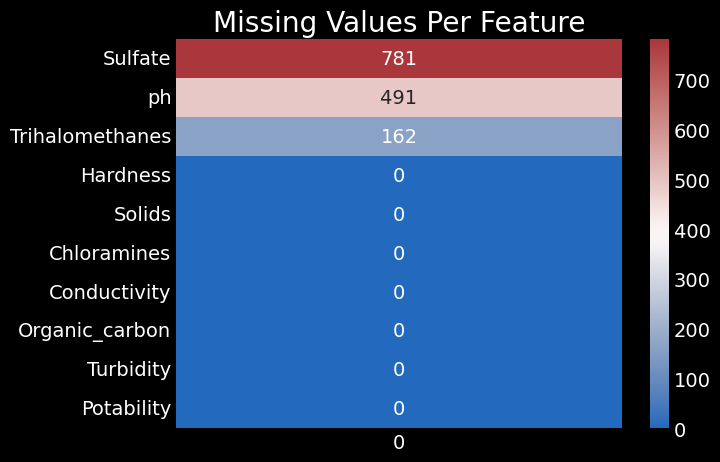

In [6]:
plt.title('Missing Values Per Feature')
Miss = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(Miss,annot=True,fmt='d',cmap='vlag')

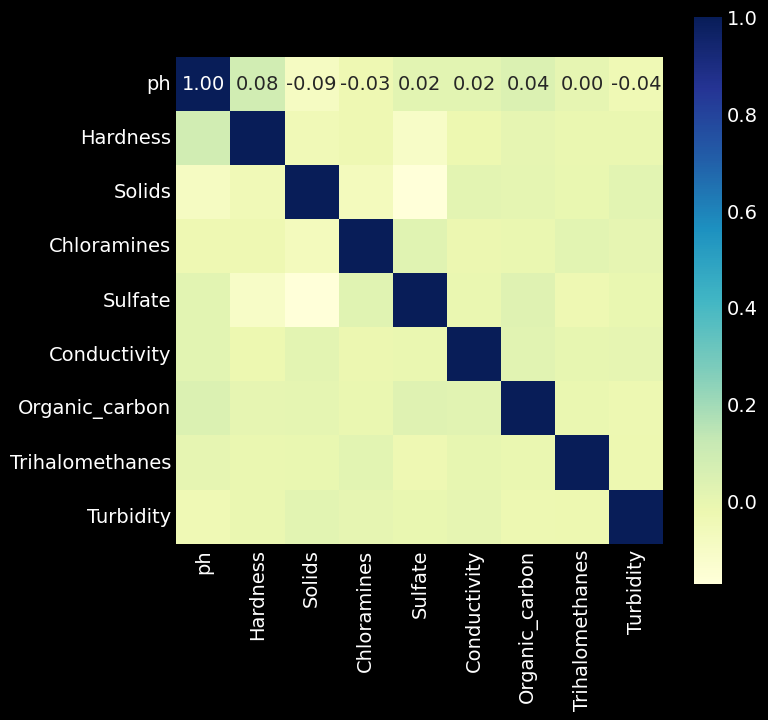

In [7]:
Corrmat = df.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(Corrmat, cmap="YlGnBu", square = True, annot=True, fmt='.2f')
plt.show()

In [8]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<Axes: xlabel='Turbidity', ylabel='Density'>

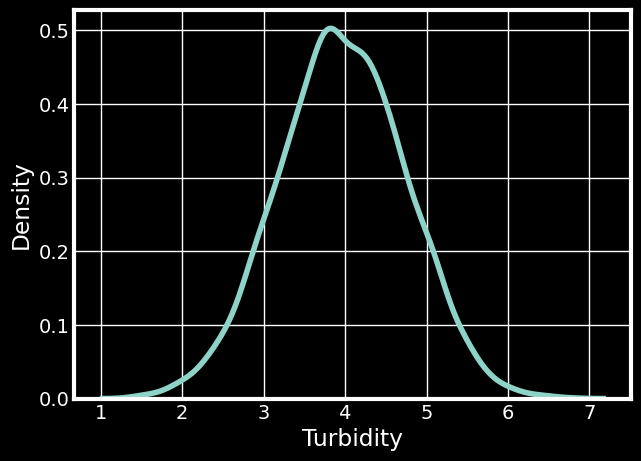

In [9]:

sns.kdeplot(df["Turbidity"])


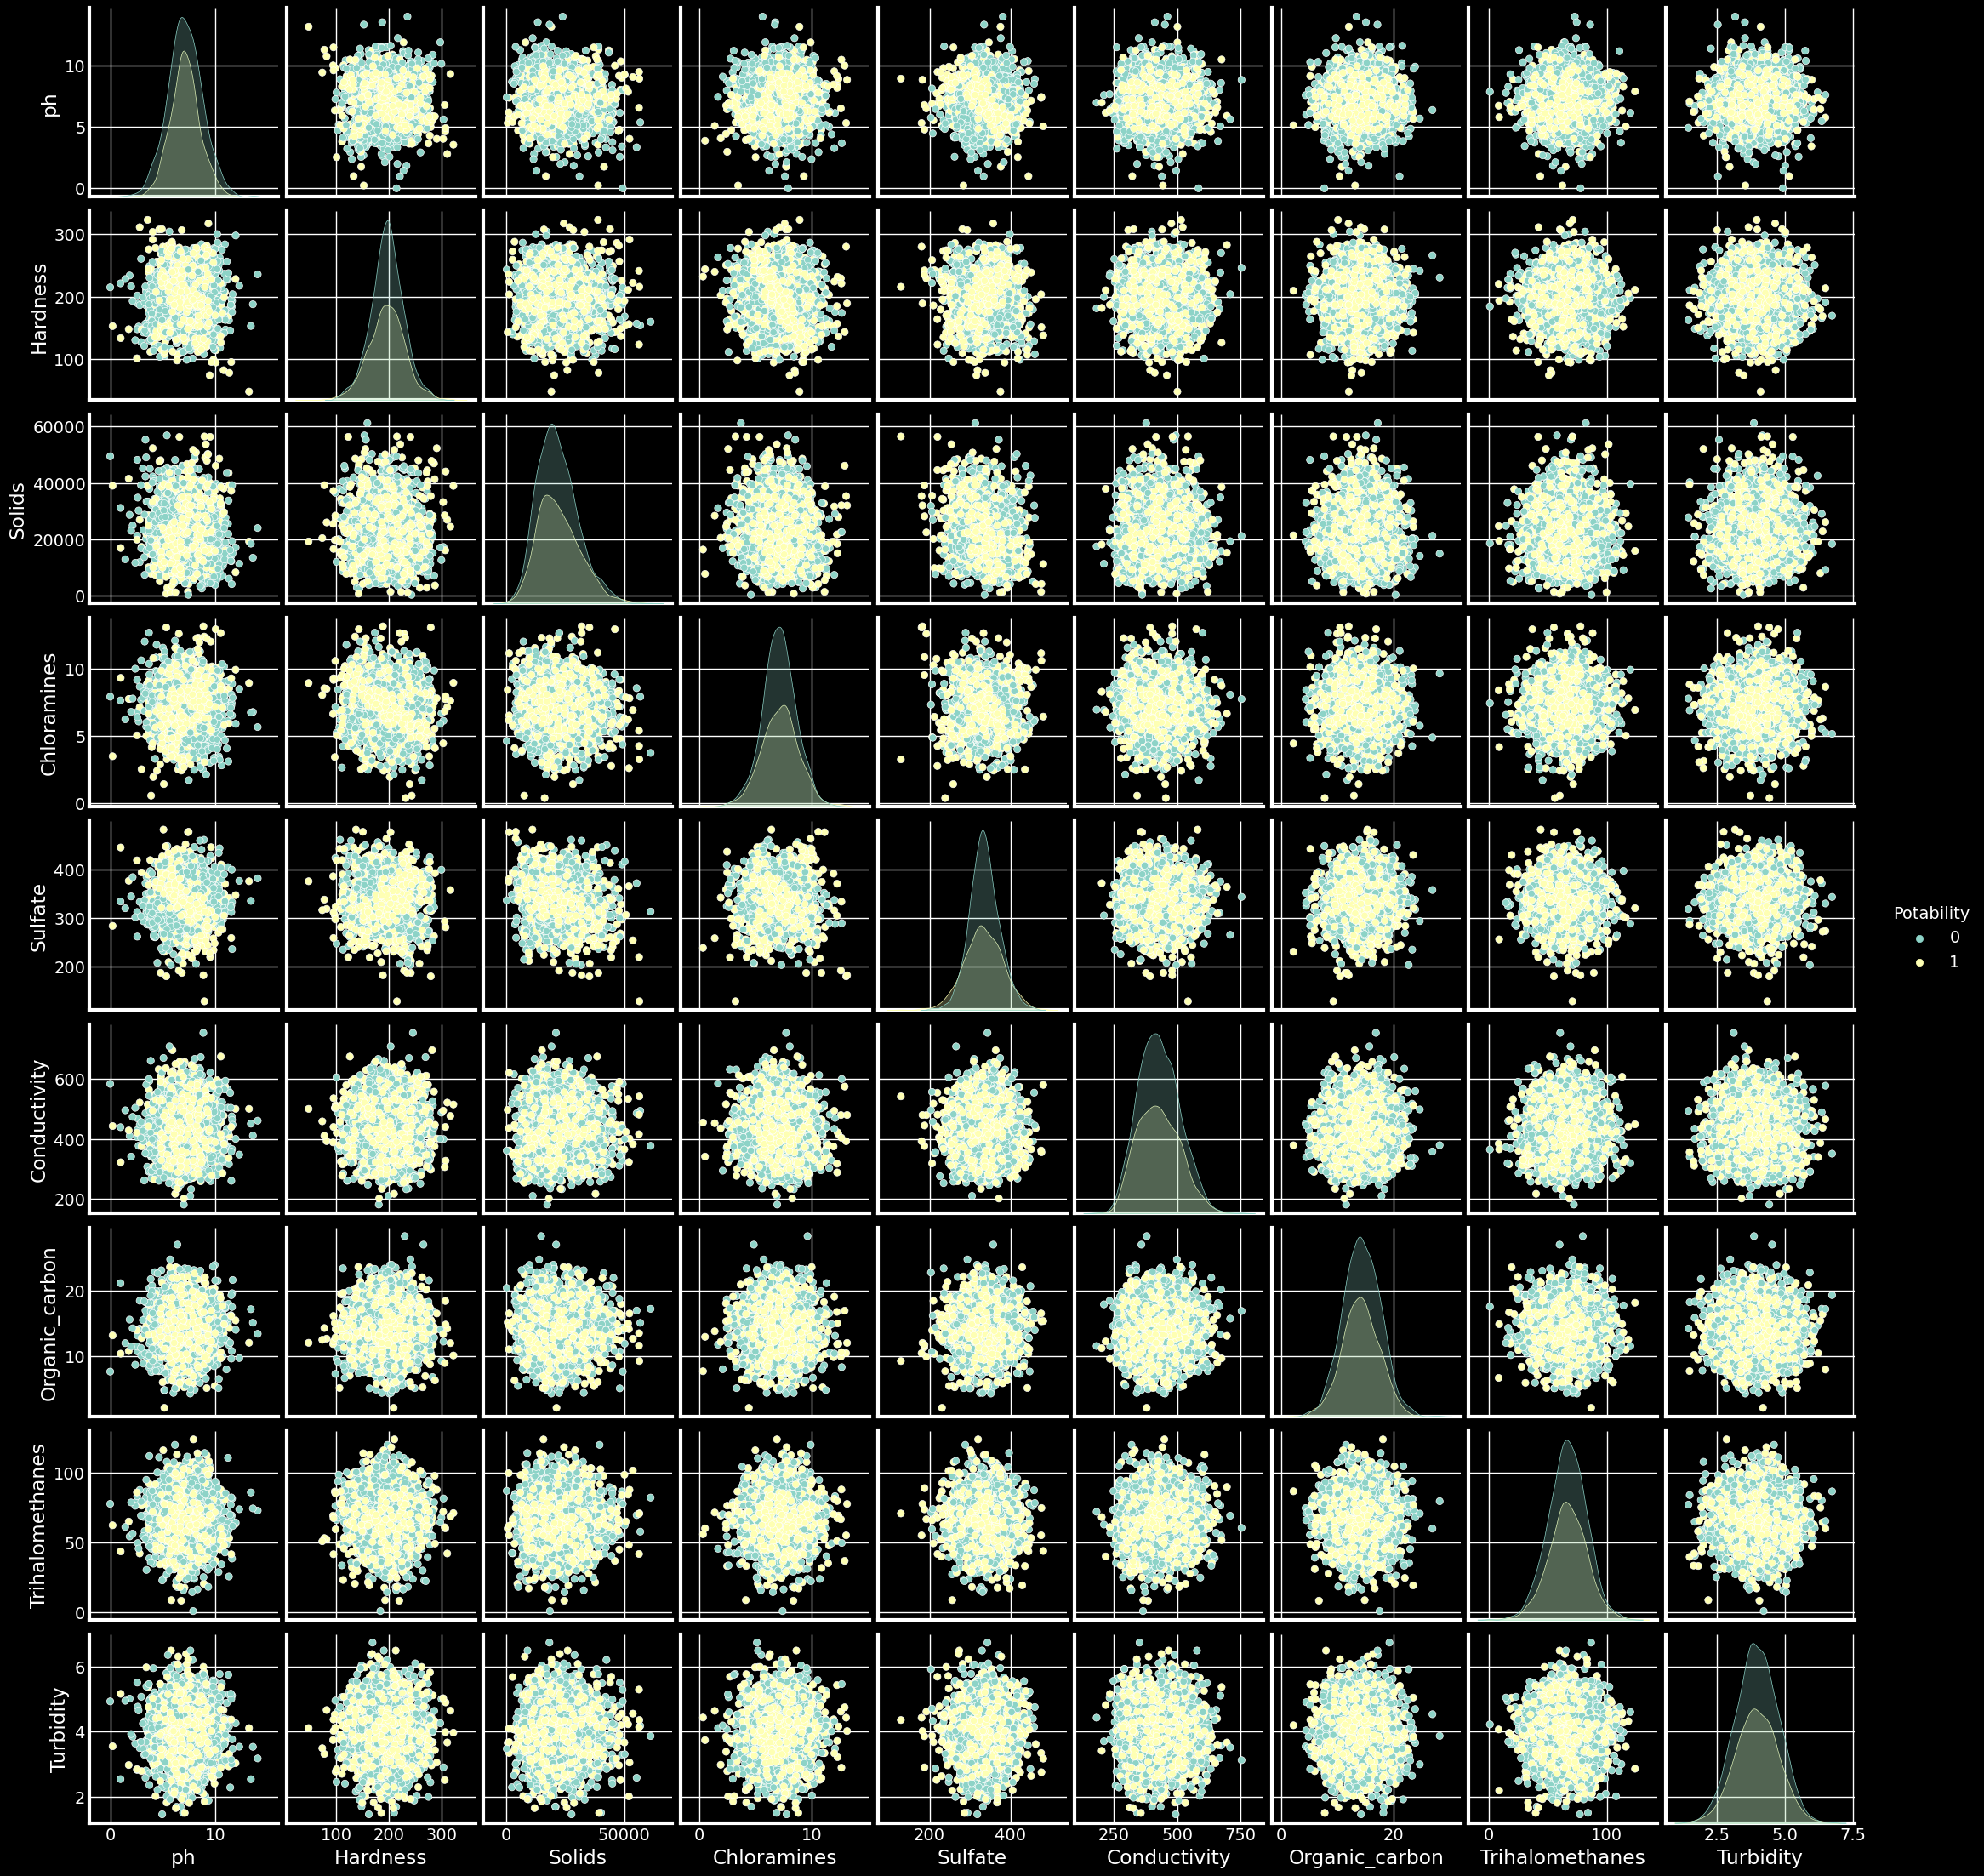

In [10]:
sns.pairplot(df, hue="Potability")

## Dropping the missing values and checking the performance of different models without imputations.

In [11]:

df_c=df.dropna()

In [12]:
## Dividing Predictors and Response 
X, y = df_c.iloc[:,:-1], df_c.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.3, random_state=123)
model = [LogisticRegression(), DecisionTreeClassifier(max_depth=6), GaussianNB(), RandomForestClassifier(),
         XGBClassifier()]
trainAccuracy = list()
testAccuracy = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)

print('The comparision\n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy})
modelScore

The comparision



Model  Train_Accuracy  \
0                               LogisticRegression()        0.593435   
1                DecisionTreeClassifier(max_depth=6)        0.620481   
2                                       GaussianNB()        0.617518   
3  (DecisionTreeClassifier(max_features='sqrt', r...        0.656008   
4  XGBClassifier(base_score=None, booster=None, c...        0.645350   

   Test_Accuracy  
0       0.597682  
1       0.644040  
2       0.617550  
3       0.673841  
4       0.649007

## Imputing by mean but the dataset was divided in terms of response 0 or 1. Then check the performance of those models again.

In [13]:

df["Potability"]=df["Potability"].astype('category')

#################################### Imputing 'ph' value #####################################

phMean_0 = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = phMean_0
phMean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = phMean_1

##################################### Imputing 'Sulfate' value #####################################

SulfateMean_0 = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_0
SulfateMean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = SulfateMean_1

################################ Imputing 'Trihalomethanes' value #####################################

TrihalomethanesMean_0 = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_0
TrihalomethanesMean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean_1

In [14]:
## Dividing Predictors and Response 
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.3, random_state=123)

In [15]:
model = [LogisticRegression(), DecisionTreeClassifier(max_depth=6), GaussianNB(), RandomForestClassifier(),
        svm.LinearSVC(), XGBClassifier()]
trainAccuracy = list()
testAccuracy = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)
    

In [16]:
print('The comparision\n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy})
modelScore

The comparision



Model  Train_Accuracy  \
0                               LogisticRegression()        0.607458   
1                DecisionTreeClassifier(max_depth=6)        0.754914   
2                                       GaussianNB()        0.617946   
3  (DecisionTreeClassifier(max_features='sqrt', r...        0.798510   
4                                        LinearSVC()        0.540646   
5  XGBClassifier(base_score=None, booster=None, c...        0.778012   

   Test_Accuracy  
0       0.617497  
1       0.730417  
2       0.617497  
3       0.777213  
4       0.384537  
5       0.776195

## Imputing by MICE(pmm)
## The imputation was done in R and the resulting file is df_mice.csv

In [17]:

df= pd. read_csv("E:/URI Materials/3rd Semester/STA 500/Project/Water_Probability/df_mice.csv")
df["Potability"]=df["Potability"].astype('category')

In [18]:
## Dividing Predictors and Response 
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.3, random_state=123)
model = [LogisticRegression(), DecisionTreeClassifier(max_depth=6), GaussianNB(), RandomForestClassifier(),
         XGBClassifier()]
trainAccuracy = list()
testAccuracy = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)

print('The comparision\n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy})
modelScore

The comparision



Model  Train_Accuracy  \
0                               LogisticRegression()        0.613617   
1                DecisionTreeClassifier(max_depth=6)        0.651559   
2                                       GaussianNB()        0.630646   
3  (DecisionTreeClassifier(max_features='sqrt', r...        0.685563   
4  XGBClassifier(base_score=None, booster=None, c...        0.665090   

   Test_Accuracy  
0       0.603255  
1       0.634791  
2       0.621567  
3       0.687691  
4       0.664293

## Imputing by MICE(cart)
## The imputation was done in R

In [21]:

df= pd. read_csv("E:/URI Materials/3rd Semester/STA 500/Project/Water_Probability/df_mice_cart.csv")
df["Potability"]=df["Potability"].astype('category')
## Dividing Predictors and Response 
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.3, random_state=123)
model = [LogisticRegression(), DecisionTreeClassifier(max_depth=6), GaussianNB(), RandomForestClassifier(),
         XGBClassifier()]
trainAccuracy = list()
testAccuracy = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)

print('The comparision\n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy})
modelScore

The comparision



Model  Train_Accuracy  \
0                               LogisticRegression()        0.612307   
1                DecisionTreeClassifier(max_depth=6)        0.647203   
2                                       GaussianNB()        0.623659   
3  (DecisionTreeClassifier(max_features='sqrt', r...        0.705645   
4  XGBClassifier(base_score=None, booster=None, c...        0.683818   

   Test_Accuracy  
0       0.602238  
1       0.652085  
2       0.631740  
3       0.681587  
4       0.662258

## Imputing by Amelia
## The imputation was done in R

In [20]:

df= pd. read_csv("E:/URI Materials/3rd Semester/STA 500/Project/Water_Probability/df_amelia.csv")
df["Potability"]=df["Potability"].astype('category')
## Dividing Predictors and Response 
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.3, random_state=123)
model = [LogisticRegression(), DecisionTreeClassifier(max_depth=6), GaussianNB(), RandomForestClassifier(),
         XGBClassifier()]
trainAccuracy = list()
testAccuracy = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)

print('The comparision\n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy})
modelScore

The comparision



Model  Train_Accuracy  \
0                               LogisticRegression()        0.612307   
1                DecisionTreeClassifier(max_depth=6)        0.647638   
2                                       GaussianNB()        0.623659   
3  (DecisionTreeClassifier(max_features='sqrt', r...        0.700864   
4  XGBClassifier(base_score=None, booster=None, c...        0.683818   

   Test_Accuracy  
0       0.602238  
1       0.651068  
2       0.631740  
3       0.695829  
4       0.662258

## Imputing by Seq_HDD
## The imputation was done in R

In [23]:

df= pd. read_csv("E:/URI Materials/3rd Semester/STA 500/Project/Water_Probability/df_HDD.csv")
df["Potability"]=df["Potability"].astype('category')
## Dividing Predictors and Response 
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.3, random_state=123)
model = [LogisticRegression(), DecisionTreeClassifier(max_depth=6), GaussianNB(), RandomForestClassifier(),
         XGBClassifier()]
trainAccuracy = list()
testAccuracy = list()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for mdl in model:
    trainResult = cross_val_score(mdl, X_train, y_train, scoring='accuracy', cv=kfold)
    trainAccuracy.append(trainResult.mean())
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    testResult = metrics.accuracy_score(y_test, y_pred)
    testAccuracy.append(testResult)

print('The comparision\n')
modelScore = pd.DataFrame({'Model' : model, 'Train_Accuracy' : trainAccuracy, 'Test_Accuracy' : testAccuracy})
modelScore

The comparision



Model  Train_Accuracy  \
0                               LogisticRegression()        0.612307   
1                DecisionTreeClassifier(max_depth=6)        0.646767   
2                                       GaussianNB()        0.623659   
3  (DecisionTreeClassifier(max_features='sqrt', r...        0.697807   
4  XGBClassifier(base_score=None, booster=None, c...        0.683818   

   Test_Accuracy  
0       0.602238  
1       0.649034  
2       0.631740  
3       0.692777  
4       0.662258

## Conclusion:
We can identify that the performance of different classification models has improved significantly after using different imputation methods instead of just considering existinig( non-missing cases).